In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Load the Labeled Faces in the Wild (LFW) people dataset (classification).
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
Imgs = lfw_dataset.images


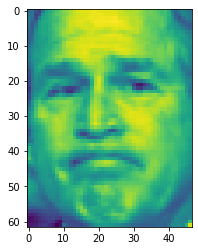

In [2]:
#Plot Face
plt.imshow(Imgs[0])

In [3]:
# Compute a PCA 
n_components = 2

#This essentially calculates the Eigenvector Basis
svd = TruncatedSVD(n_components=n_components).fit(X)

In [4]:
#The components are the eigenvectors in the Eigenvector Basis, ordered by how much variance they explain (eigenvalues)
eigenfaces = svd.components_.reshape((n_components, h, w))

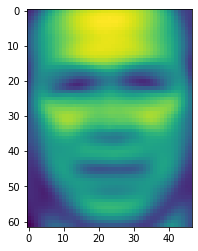

In [5]:
#This is the eigenface (eigenvector of faces) that explains most of the variance of a "face"
plt.imshow(eigenfaces[0])

In [6]:
#We can transform any new image of a face into a lower dimensional space. Note that didn't take a "new" face out of convenience
X_transformed = svd.transform(X)

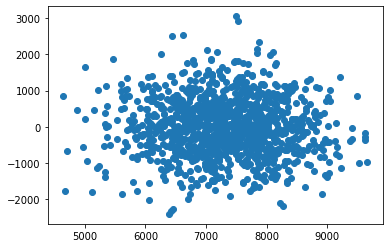

In [7]:
#Since we reduced the dimensionality onto 2 dimensions, we can plot all the faces in a scatter plot
plt.scatter(X_transformed[:,0], X_transformed[:,1])

In [8]:
# On the basis of that we might be able to build a 
# simple classifier that separates the 2D dots, depending on whether the
# original image contained a face or not => Face detection. 
# Or you could use a clustering algorithm if you like ... 